# Problem Statement

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
file_name = "S&P500_Stock_Data.csv"

In [3]:
data = pd.read_csv(file_name)

X_label_1 = "Interest Rates"
X_label_2 = "Employment"
Y_label = "S&P 500 Price"

X_1 = data[X_label_1]
X_2 = data[X_label_2]

X = data[['Interest Rates', 'Employment']]
Y = data[Y_label]

In [4]:
data.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [5]:
data.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# Finding Correlation

Lets try to find a basic correlation using joint plots between Interest rates and Stock price

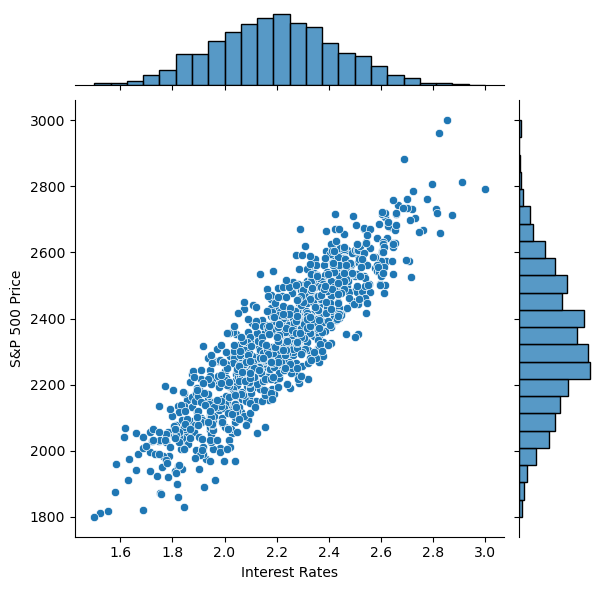

In [7]:
sns.jointplot(x=X_label_1, y=Y_label, data=data)

In this we can see a somewhat increasing correlation between stock price and interest rates

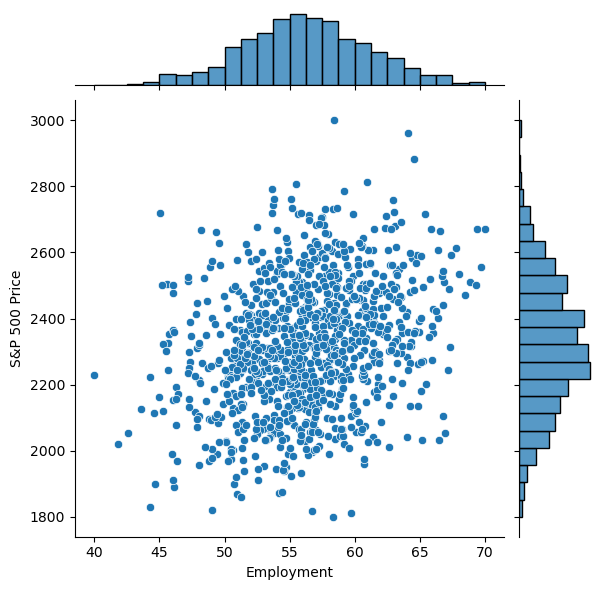

In [8]:
sns.jointplot(x=X_label_2, y=Y_label, data=data)

It is hard to see a correlation here of the stock price with Employment numbers

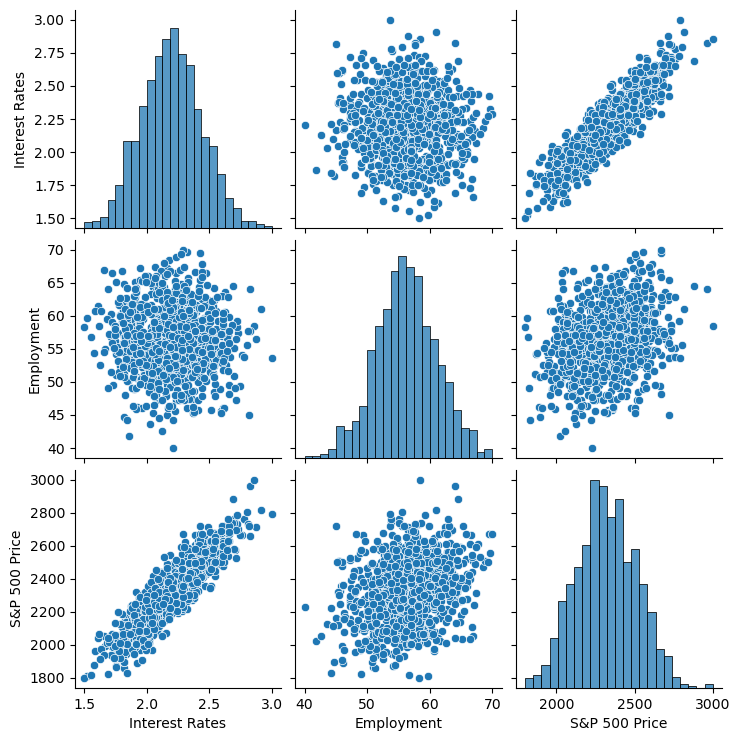

In [9]:
sns.pairplot(data)

We can conclude

1) There is no direct correlation between employment and stock prices

2) There is no direct correlation between employment and interest rates

3) Interest rates and stock price correlate monotonically increasing

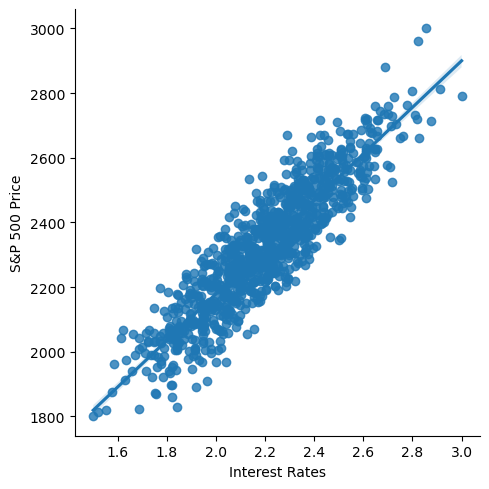

In [10]:
sns.lmplot(x =X_label_1, y =Y_label, data = data)

<AxesSubplot:>

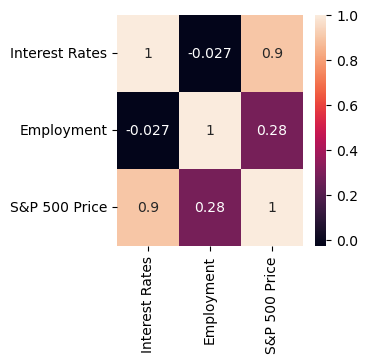

In [68]:
plt.figure(figsize = (3, 3))
sns.heatmap(data.corr(), annot = True)

There is somewhat a linear correlation and a linear regression model would be a good fit for interest rates and stock price

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 249 to 109
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  700 non-null    float64
 1   Employment      700 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 983 to 557
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  300 non-null    float64
 1   Employment      300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


# Applying Linear Regression

In [29]:
model = LinearRegression()

In [31]:
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
print('Linear Model Coefficients (m)', model.coef_)
print('Linear Model Coefficients (b)', model.intercept_)

Linear Model Coefficients (m) [718.86223983  12.47291828]
Linear Model Coefficients (b) 39.55927498590427


In [33]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [37]:
def compute_metrics(X, y_test, y_predict):
    k = X.shape[1]
    n = len(X)
    RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
    MSE = mean_squared_error(y_test, y_predict)
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
    MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100
    print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)
    return [RMSE, MSE, MAE, r2, adj_r2, MAPE]
    

In [38]:
metrics_on_training_data = compute_metrics(X_train, Y_train, Y_train_predict)

RMSE =  261.068 
MSE = 68156.5792647689 
MAE = 210.86238195837285 
R2 = -0.8664536126555111 
Adjusted R2 = -0.8718092901667178 
MAPE = 9.132589545977922


In [40]:
metrics_on_test_data = compute_metrics(X_test, Y_test, Y_test_predict)

RMSE =  270.382 
MSE = 73106.51792488611 
MAE = 219.51481043431167 
R2 = -0.832229051379147 
Adjusted R2 = -0.8445672941493771 
MAPE = 9.595346896171723


# Visualization

In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [42]:
X_label_1 = "Interest Rates"
X_label_2 = "Employment"
Y_label = "S&P 500 Price"

X_1 = data[X_label_1]
X_2 = data[X_label_2]

In [44]:
x1_linspaced = np.linspace(X_1.min(), X_1.max(), 100)

In [45]:
x2_linspaced = np.linspace(X_2.min(), X_2.max(), 100)

In [49]:
x1_surf, x2_surf = np.meshgrid(x1_linspaced, x2_linspaced)

In [50]:
x1_surf.shape

(100, 100)

In [51]:
onlyX = pd.DataFrame( {X_label_1: x1_surf.ravel(), X_label_2:x2_surf.ravel()    } ) 

In [52]:
onlyX.shape

(10000, 2)

In [53]:
fittedY = model.predict(onlyX)

In [54]:
fittedY.shape

(10000,)

In [56]:
fittedY = fittedY.reshape(x1_surf.shape)

In [60]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')
# ax.scatter( X_1, X_2 , Y , c = 'blue', marker ='x'  )
# ax.plot_surface(x1_surf, x2_surf, fittedY, color = 'red', alpha = 0.3)
# ax.set_xlabel(X_label_1)
# ax.set_ylabel(X_label_2)
# ax.set_zlabel(Y_label)

def plot_3d_visualization(X_1, X_2 , Y, x1_surf, x2_surf, fittedY, X_label_1, X_label_2, Y_label, view_init_tuple=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter( X_1, X_2 , Y , c = 'blue', marker ='x'  )
    ax.plot_surface(x1_surf, x2_surf, fittedY, color = 'red', alpha = 0.3)
    ax.set_xlabel(X_label_1)
    ax.set_ylabel(X_label_2)
    ax.set_zlabel(Y_label)
    if view_init_tuple:
        ax.view_init(*view_init_tuple)
    

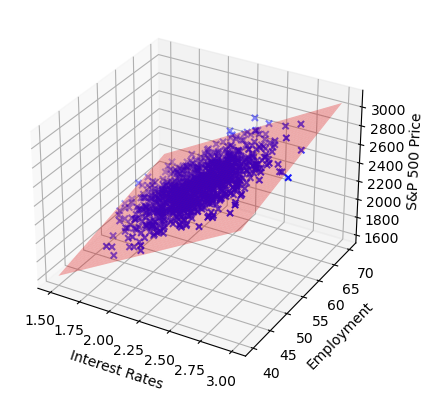

In [61]:
plot_3d_visualization(X_1, X_2 , Y, x1_surf, x2_surf, fittedY, X_label_1, X_label_2, Y_label, view_init_tuple=None)

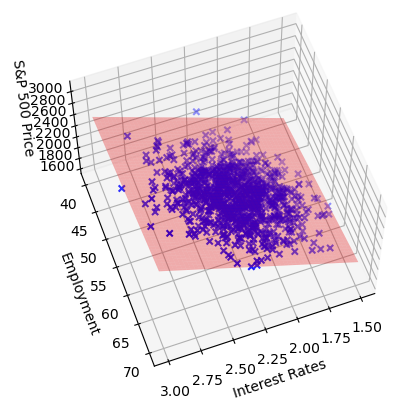

In [63]:

# viewing it from a different angle
plot_3d_visualization(X_1, X_2 , Y, x1_surf, x2_surf, fittedY, X_label_1, X_label_2, Y_label, view_init_tuple=(60,70))

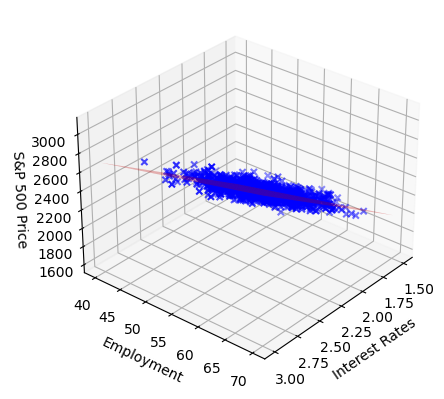

In [64]:

# viewing it from a different angle
plot_3d_visualization(X_1, X_2 , Y, x1_surf, x2_surf, fittedY, X_label_1, X_label_2, Y_label, view_init_tuple=(30,40))

In [66]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,718.862240
Employment,12.472918
